In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14241/862020/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1671713826&Signature=1IY%2F0aQkwaSkIQV39efuDpypIwg2sCn%2B2wvgIJoRsLJwbr%2BtmBF3uoqm0I%2ButtCNxLyvjQBR9%2FR5EnHg7jTg4JHoaEfPB5IDxdiNe9edrKn65mneOAPYUVAuHIEQauUVw93nOJoMO3D0CSXzmnDD%2FJb3NdqSiIcEPFt1d8Qhe1FaG5BQ9Us%2FAOhbQsYqOUZgnNn83ys0Q4brt4Uy8lpE8rt0%2FCOMErO5wwVm%2FwtVjl95oOW3RSw5944DILbxaTQxEgtlVsR8Mi7Isgw619R%2BdkyDPKyIU6H0q%2BWKMZkWsfSqfq7b2CG%2BkevQy%2Bv7V3AWTtMXpm0ZgpR2vOK8bNVk%2BQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dseverstal-steel-defect-detection.zip" -c -O 'severstal-steel-defect-detection.zip'

--2022-12-22 11:21:22--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14241/862020/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1671713826&Signature=1IY%2F0aQkwaSkIQV39efuDpypIwg2sCn%2B2wvgIJoRsLJwbr%2BtmBF3uoqm0I%2ButtCNxLyvjQBR9%2FR5EnHg7jTg4JHoaEfPB5IDxdiNe9edrKn65mneOAPYUVAuHIEQauUVw93nOJoMO3D0CSXzmnDD%2FJb3NdqSiIcEPFt1d8Qhe1FaG5BQ9Us%2FAOhbQsYqOUZgnNn83ys0Q4brt4Uy8lpE8rt0%2FCOMErO5wwVm%2FwtVjl95oOW3RSw5944DILbxaTQxEgtlVsR8Mi7Isgw619R%2BdkyDPKyIU6H0q%2BWKMZkWsfSqfq7b2CG%2BkevQy%2Bv7V3AWTtMXpm0ZgpR2vOK8bNVk%2BQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dseverstal-steel-defect-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 173.194.210.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1684204253 (1.6G) [application/zip]
Saving to: ‘seve

In [ ]:
#unzipping the data
!unzip '/content/severstal-steel-defect-detection.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f75320d.jpg  
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images

In [ ]:
#installing the segmentation module
!pip install git+https://github.com/qubvel/segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-2nvxp57_
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-2nvxp57_
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 3.0 MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33809 sha256=a6a09a58269e67ab9e82df77ab32a61403dd15e3b860d051cd5dd9ee0c037a0d
  Stored in directory: /tmp/pip-ephem-wheel-cache-r8yy6ad_/wheels/91/c4/cb/a53fedf4b956b22b486a1f135859dacfd3809d410e34e7906c
Successfully built segmentation-models


In [ ]:
%load_ext tensorboard

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import matplotlib.patches as patches
import re
import random
from sklearn.model_selection import train_test_split
import cv2
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.utils import plot_model
from PIL import Image
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Model,load_model
from keras.regularizers import l2
import datetime

import segmentation_models as sm
from segmentation_models import get_preprocessing
import imgaug.augmenters as iaa
sm.set_framework('tf.keras')
sm.framework()
from segmentation_models.metrics import iou_score

Segmentation Models: using `keras` framework.


In [ ]:
#https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def rle_to_mask(rle):
# CONVERT RLE TO MASK
   if (pd.isnull(rle))|(rle=='')|(rle=='-1'):
       return np.zeros((256,800),dtype=np.uint8) #If the EncodedPixels string is empty an empty mask is returned
   height=256
   width=1600
   mask=np.zeros(width*height,dtype=np.uint8)
   array=np.asarray([int(x) for x in rle.split()])
   starts=array[0::2]-1
   lengths=array[1::2]
   for index,start in enumerate(starts):
      mask[int(start):int(start+lengths[index])]=1
   return mask.reshape((height,width),order='F')[::,::2]

"""
Implementing custom data generator
#https://towardsdatascience.com/implementing-custom-data-generators-in-keras-de56f013581c
#https://www.kaggle.com/cdeotte/keras-unet-with-eda
"""
class train_DataGenerator(keras.utils.Sequence):
    def __init__(self,dataframe,batch_size=1,shuffle=True,preprocess=None,info={}):
     self.batch_size = batch_size
     self.df = dataframe
     self.indices = self.df.index.tolist()
     self.preprocess = preprocess
     self.shuffle = shuffle
     self.on_epoch_end()
    def __len__(self):
     return len(self.indices) // (self.batch_size)
    def __getitem__(self, index):
     index = self.index[index * self.batch_size:(index + 1) * self.batch_size]
     batch = [self.indices[k] for k in index]
     X, y = self.__get_data(batch)
     return X, y
    def on_epoch_end(self):
     self.index = np.arange(len(self.indices))
     if self.shuffle == True:
        np.random.shuffle(self.index)
    def __get_data(self, batch):
     train_datagen = ImageDataGenerator()
#https://www.geeksforgeeks.org/python-select-random-value-from-a-list/
     X=np.empty((self.batch_size,256,800,3),dtype=np.float32) # image place-holders
     Y=np.empty((self.batch_size,256,800,1),dtype=np.float32)# 1 mask place-holders
     for i,id in enumerate(batch):
      X[i,] = Image.open('/content/train_images/' + str(self.df['image_id'].loc[id])).resize((800,256))
      Y[i,:,:,0]=rle_to_mask(self.df['rle'].loc[id])
      t=random.choice([0,10,20,30,40])
      z=random.choice([0.8,1])
      flip=random.choice(['True','False'])
      param={'tx':t,'ty':t,'zx':z,'zy':z,}
      for i,e in enumerate(X):
          X[i] = train_datagen.apply_transform(e,transform_parameters=param)
      for i,f in enumerate(Y):
          Y[i] = train_datagen.apply_transform(f,transform_parameters=param)
      if self.preprocess!=None: X = self.preprocess(X)
      return X,Y


# Implementing custom data generator
#https://towardsdatascience.com/implementing-custom-data-generators-in-keras-de56f013581c
class test_DataGenerator(keras.utils.Sequence):
  def __init__(self,dataframe,batch_size=1,shuffle=False,preprocess=None,info={}):
   self.batch_size = batch_size
   self.df = dataframe
   self.indices = self.df.index.tolist()
   self.preprocess = preprocess
   self.shuffle = shuffle
   self.on_epoch_end()
  def __len__(self):
   return len(self.indices) // (self.batch_size)
  def __getitem__(self, index):
   index = self.index[index * self.batch_size:(index + 1) * self.batch_size]
   batch = [self.indices[k] for k in index]
   X, y = self.__get_data(batch)
   return X, y
  def on_epoch_end(self):
   self.index = np.arange(len(self.indices))
   if self.shuffle == True:
     np.random.shuffle(self.index)
  def __get_data(self, batch):
   X = np.empty((self.batch_size,256,800,3),dtype=np.float32) # image place-holders
   Y = np.empty((self.batch_size,256,800,1),dtype=np.float32)# 1 mask place-holders
   for i, id in enumerate(batch):
     X[i,] = Image.open('/content/train_images/' + str(self.df['image_id'].loc[id])).resize((800,256))
     Y[i,:,:,0]=rle_to_mask(self.df['rle'].loc[id])
    # preprocess input
   if self.preprocess!=None: X = self.preprocess(X)
   return X,Y
def rle2mask(rle):
# CONVERT RLE TO MASK
   if (pd.isnull(rle))|(rle=='')|(rle=='-1'):
      return np.zeros((256,1600) ,dtype=np.uint8)
   height= 256
   width = 1600
   mask= np.zeros( width*height ,dtype=np.uint8)
   array = np.asarray([int(x) for x in rle.split()])
   starts = array[0::2]-1
   lengths = array[1::2]
   for index, start in enumerate(starts):
      mask[int(start):int(start+lengths[index])] = 1
   return mask.reshape( (height,width), order='F' )

def plot_mask(rle_defect,k,pred):
   
     train_folder_path='/content/train_images/'
     # Create figure and axes
     fig,ax=plt.subplots(1,3,figsize=(15,2))
     fig.suptitle('Defect_image')
   
     image_id=rle_defect[0][0]
     rle=rle_defect[0][1]
     im=Image.open(train_folder_path+str(image_id))
     ax[0].imshow(im)
     ax[0].set_title(image_id)
     mask=rle2mask(rle)
     ax[1].imshow(mask)
     ax[1].set_title("Actual Mask for "+str(image_id))
     c1=Image.fromarray(pred[0][:,:,0])
     ax[2].imshow(np.array(c1.resize((1600,256)))>0.5)
     ax[2].set_title("Predicted Mask for "+str(image_id))
     fig.set_facecolor("yellow")
     plt.show()

In [ ]:
with open('/content/train_4.pkl','rb') as f:
    train_4=pickle.load(f)

In [ ]:
def get_model():
    UNet=tf.keras.models.load_model('model_unet.h5',custom_objects={'binary_crossentropy_plus_dice_loss':sm.losses.bce_dice_loss,'iou_score':iou_score})
    return UNet


In [ ]:
from pathlib import Path

In [ ]:
train_4.head(50)

,image_id,rle
10424,d3b2a00de.jpg,64863 6 65110 19 65360 29 65490 2 65613 35 657...
11840,f0dbecd3d.jpg,169742 2 169997 5 170252 9 170507 12 170762 15...
9335,bd4957b80.jpg,129032 1 129288 2 129544 2 129800 3 130056 3 1...
3640,49da138ee.jpg,78079 2 78333 4 78587 6 78841 8 79095 10 79349...
10729,d96c0e264.jpg,326648 1 326904 3 327159 5 327415 6 327670 9 3...
6787,89ef83ab7.jpg,22578 10 22601 12 22826 53 23077 67 23330 75 2...
9834,c7a7f24d9.jpg,154882 1 155138 3 155394 5 155650 6 155906 8 1...
9226,bb1977eed.jpg,37861 4 38115 11 38368 19 38622 26 38876 31 39...
11658,ecb50399d.jpg,61515 23 61747 47 61999 51 62251 55 62503 59 6...
5734,73d4dae19.jpg,67466 2 67720 4 67975 7 68231 9 68486 11 68742...


In [ ]:
train_4[44:45]

,image_id,rle
107,0218c0fcc.jpg,208664 2 208919 5 209175 8 209430 11 209686 14...


In [ ]:
train_4[44:45].to_csv('train_sample3.csv',index=False)

In [ ]:
train_sample2

,image_id,rle
9365,bdb31300b.jpg,316592 9 316830 28 317069 45 317316 55 317571 ...


In [ ]:
train_sample1.to_csv('train_sample1.csv',index=False)

In [ ]:
df1=pd.read_csv('/content/train_sample1.csv')
df1

,image_id,rle
0,0030401a5.jpg,186833 1 187089 3 187344 6 187600 7 187855 10 ...


In [ ]:
df1.values[0][1]

'186833 1 187089 3 187344 6 187600 7 187855 10 188111 11 188366 14 188622 16 188877 18 189133 20 189388 22 189644 24 189900 26 190155 28 190411 28 190666 29 190922 29 191178 29 191433 30 191689 30 191944 31 191987 3 192200 31 192241 9 192455 32 192495 15 192711 32 192750 19 192967 32 193004 21 193222 33 193259 22 193478 33 193513 24 193733 60 193989 60 194247 58 194506 55 194766 51 195025 48 195284 45 195543 42 195802 39 196061 36 196319 34 196576 33 196834 31 197091 30 197348 29 197605 28 197862 27 198120 25 198377 24 198635 22 198894 19 199153 16 199411 14 199670 11 199930 7 200190 3 218855 3 219106 9 219357 14 219608 20 219858 27 220107 34 220358 40 220612 43 220865 46 221119 49 221373 52 221626 55 221879 59 222132 62 222385 65 222638 67 222891 70 223145 72 223398 75 223651 77 223905 79 224160 80 224415 82 224669 84 224924 85 225179 87 225429 93 225678 100 225929 105 226180 111 226432 115 226683 120 226936 124 227191 125 227446 126 227701 128 227934 5 227956 129 228186 12 228211 130

1/1 [==============================] - 1s 1s/step


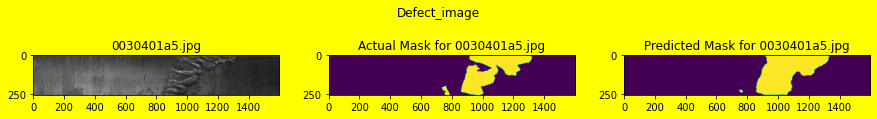

In [ ]:
model = get_model()
train_preds=model.predict_generator(test_DataGenerator(df1,preprocess=get_preprocessing('mobilenet')),verbose=1)
plot_mask(df1.values,1,train_preds)